<a href="https://colab.research.google.com/github/Raghava-1845/NNDL-6/blob/main/Double%20digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow numpy matplotlib


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Function to create double-digit images
def make_double_digits(x, y, num_samples):
    images = []
    labels = []

    for _ in range(num_samples):
        i1, i2 = np.random.randint(0, len(x), 2)

        # Combine images horizontally
        img = np.hstack((x[i1], x[i2]))
        label = y[i1] * 10 + y[i2]

        images.append(img)
        labels.append(label)

    return np.array(images), np.array(labels)

# Create datasets
x_train_dd, y_train_dd = make_double_digits(x_train, y_train, 60000)
x_test_dd, y_test_dd = make_double_digits(x_test, y_test, 10000)

# Add channel dimension
x_train_dd = x_train_dd[..., np.newaxis]
x_test_dd = x_test_dd[..., np.newaxis]

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 56, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='softmax')  # 00–99
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model.fit(x_train_dd, y_train_dd, epochs=5, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(x_test_dd, y_test_dd)
print("Test Accuracy:", test_acc)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 102s 59ms/step - accuracy: 0.6382 - loss: 1.4382 - val_accuracy: 0.9318 - val_loss: 0.2299
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 99s 59ms/step - accuracy: 0.9533 - loss: 0.1492 - val_accuracy: 0.9538 - val_loss: 0.1431
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 100s 59ms/step - accuracy: 0.9762 - loss: 0.0746 - val_accuracy: 0.9640 - val_loss: 0.1157
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 141s 59ms/step - accuracy: 0.9841 - loss: 0.0497 - val_accuracy: 0.9617 - val_loss: 0.1317
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 98s 58ms/step - accuracy: 0.9883 - loss: 0.0357 - val_accuracy: 0.9685 - val_loss: 0.1167
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9661 - loss: 0.1213
Test Accuracy: 0.9646999835968018


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


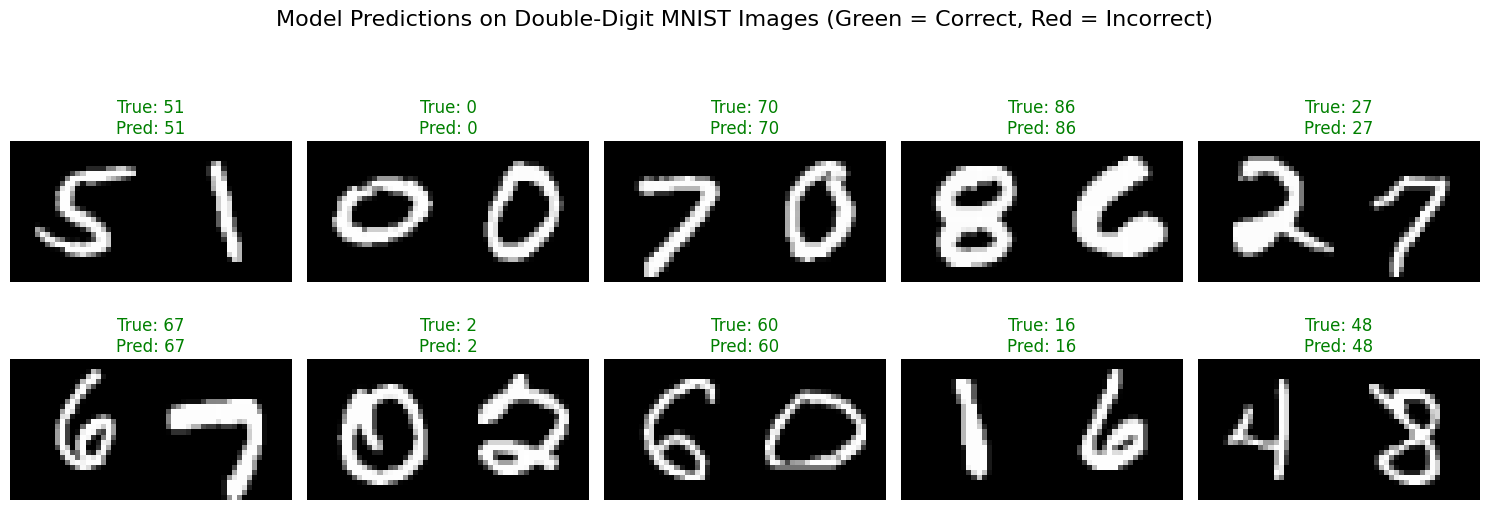

In [3]:
import matplotlib.pyplot as plt

# Get predictions for a few test samples
num_samples_to_show = 10
random_indices = np.random.choice(len(x_test_dd), num_samples_to_show, replace=False)

sampled_images = x_test_dd[random_indices]
sampled_true_labels = y_test_dd[random_indices]
sampled_predictions = np.argmax(model.predict(sampled_images), axis=1)

plt.figure(figsize=(15, 6))
for i in range(num_samples_to_show):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sampled_images[i].reshape(28, 56), cmap='gray')
    color = 'green' if sampled_predictions[i] == sampled_true_labels[i] else 'red'
    plt.title(f'True: {sampled_true_labels[i]}\nPred: {sampled_predictions[i]}', color=color)
    plt.axis('off')
plt.suptitle('Model Predictions on Double-Digit MNIST Images (Green = Correct, Red = Incorrect)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()